<a href="https://colab.research.google.com/github/alexmplastow/IE534-CS547-Emmerson/blob/main/DataPreProcessing%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Overdose Deaths Project

# Download dataset

In [ ]:
!wget -c https://data.cdc.gov/api/views/xkb8-kh2a/rows.csv?accessType=DOWNLOAD&bom=true&format=true -O Drug_Overdose_Deaths.csv #name did not changed...

/bin/bash: -O: command not found
--2022-12-09 03:48:48--  https://data.cdc.gov/api/views/xkb8-kh2a/rows.csv?accessType=DOWNLOAD
Resolving data.cdc.gov (data.cdc.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cdc.gov (data.cdc.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [     <=>            ]   9.20M  9.91MB/s    in 0.9s    

2022-12-09 03:48:49 (9.91 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [9651249]



# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Mining and Visualization

## Import Data

In [ ]:
df = pd.read_csv('rows.csv?accessType=DOWNLOAD', thousands=',')
print("original df shape: ", df.shape)

original df shape:  (53190, 12)


In [ ]:
df.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Percent with drugs specified,88.095238,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.000000,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126.0


## Drop useless features

In [ ]:
new_df = df.drop(labels=["State Name", "Period", "Percent Complete", "Footnote", "Footnote Symbol", "Predicted Value"], axis=1) #"Percent Pending Investigation",
new_df.dropna(axis=0, how='any', inplace=True) # drop "Data Value" NAN
print("new df shape: ", new_df.shape)

new df shape:  (43189, 6)


In [ ]:
new_df.head()

,State,Year,Month,Indicator,Data Value,Percent Pending Investigation
0,AK,2015,April,Percent with drugs specified,88.095238,0.0
4,AK,2015,April,Number of Drug Overdose Deaths,126.000000,0.0
6,AK,2015,April,Number of Deaths,4133.000000,0.0
12,AK,2015,August,Percent with drugs specified,87.903226,0.0
13,AK,2015,August,Number of Drug Overdose Deaths,124.000000,0.0


## Data Visualization

### State

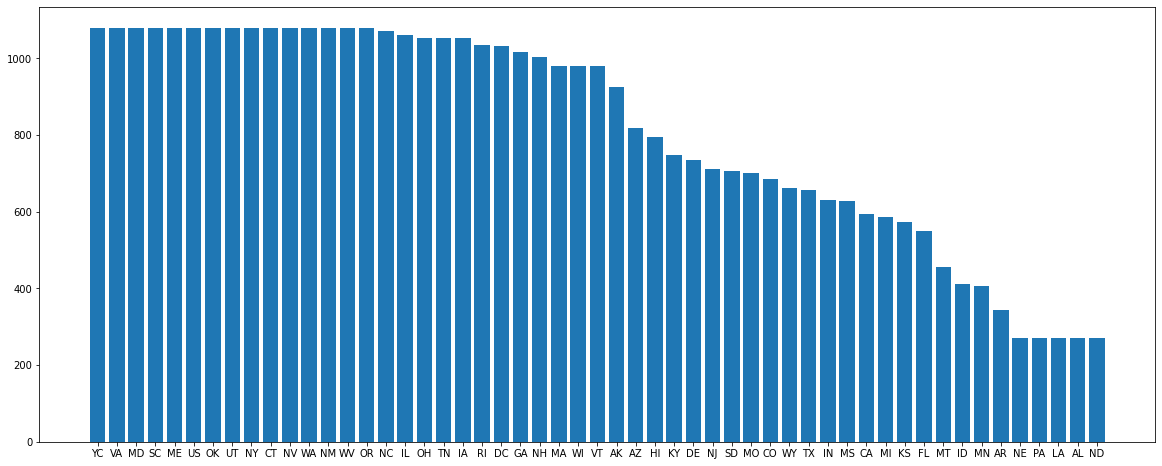

In [ ]:
state_count = new_df['State'].value_counts()
state_lable = np.array(state_count.index)
state_value = np.array(state_count.values)
plt.figure(figsize=(20, 8))
plt.bar(range(state_value.shape[0]), state_value, tick_label=state_lable)
plt.show()

In [ ]:
new_df['State'].describe()

count     43189
unique       53
top          YC
freq       1080
Name: State, dtype: object

### Indicator

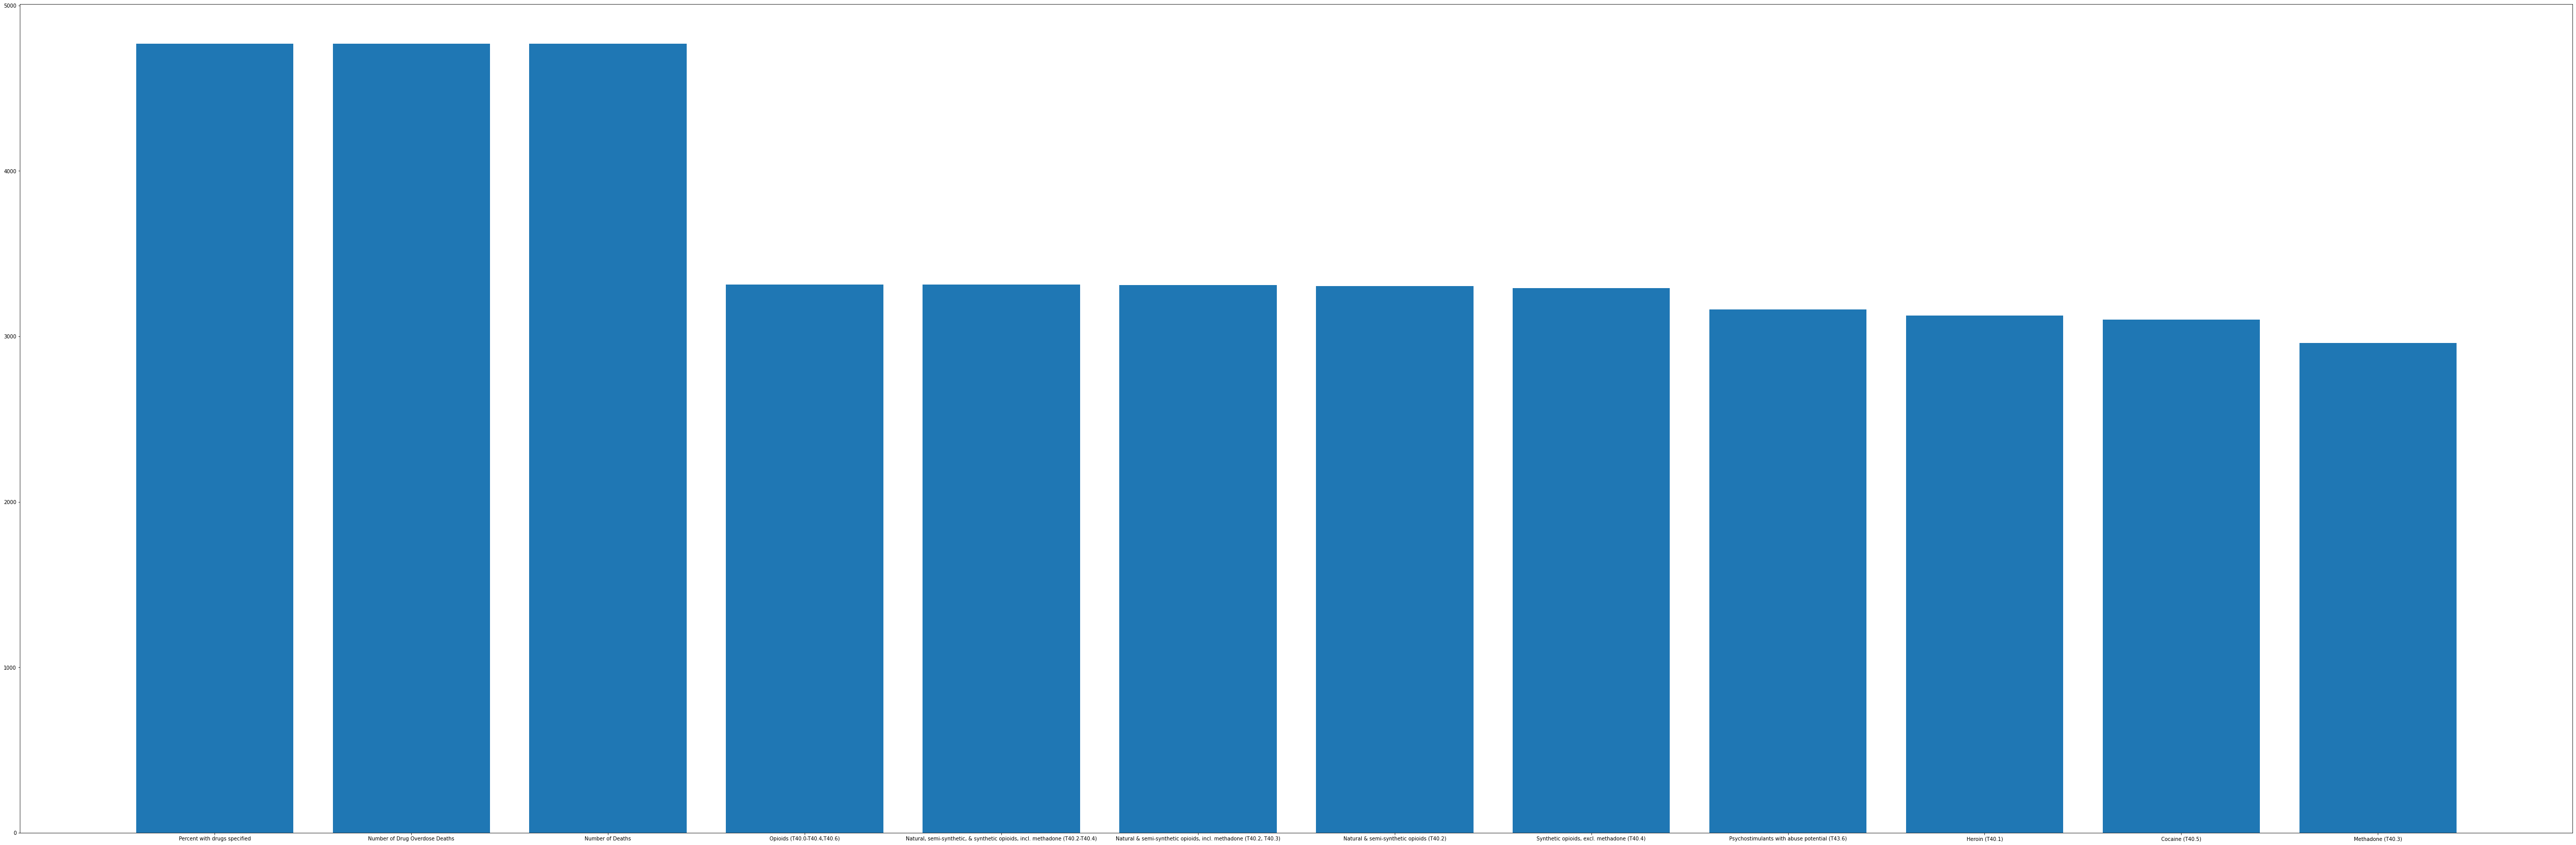

In [ ]:
indicator_count = new_df['Indicator'].value_counts()
indicator_lable = np.array(indicator_count.index)
indicator_value = np.array(indicator_count.values)
plt.figure(figsize=(90, 30))
plt.bar(range(indicator_value.shape[0]), indicator_value, tick_label=indicator_lable)
plt.show()

In [ ]:
new_df['Indicator'].describe()

count                            43189
unique                              12
top       Percent with drugs specified
freq                              4770
Name: Indicator, dtype: object

### Percent Pending Investigation

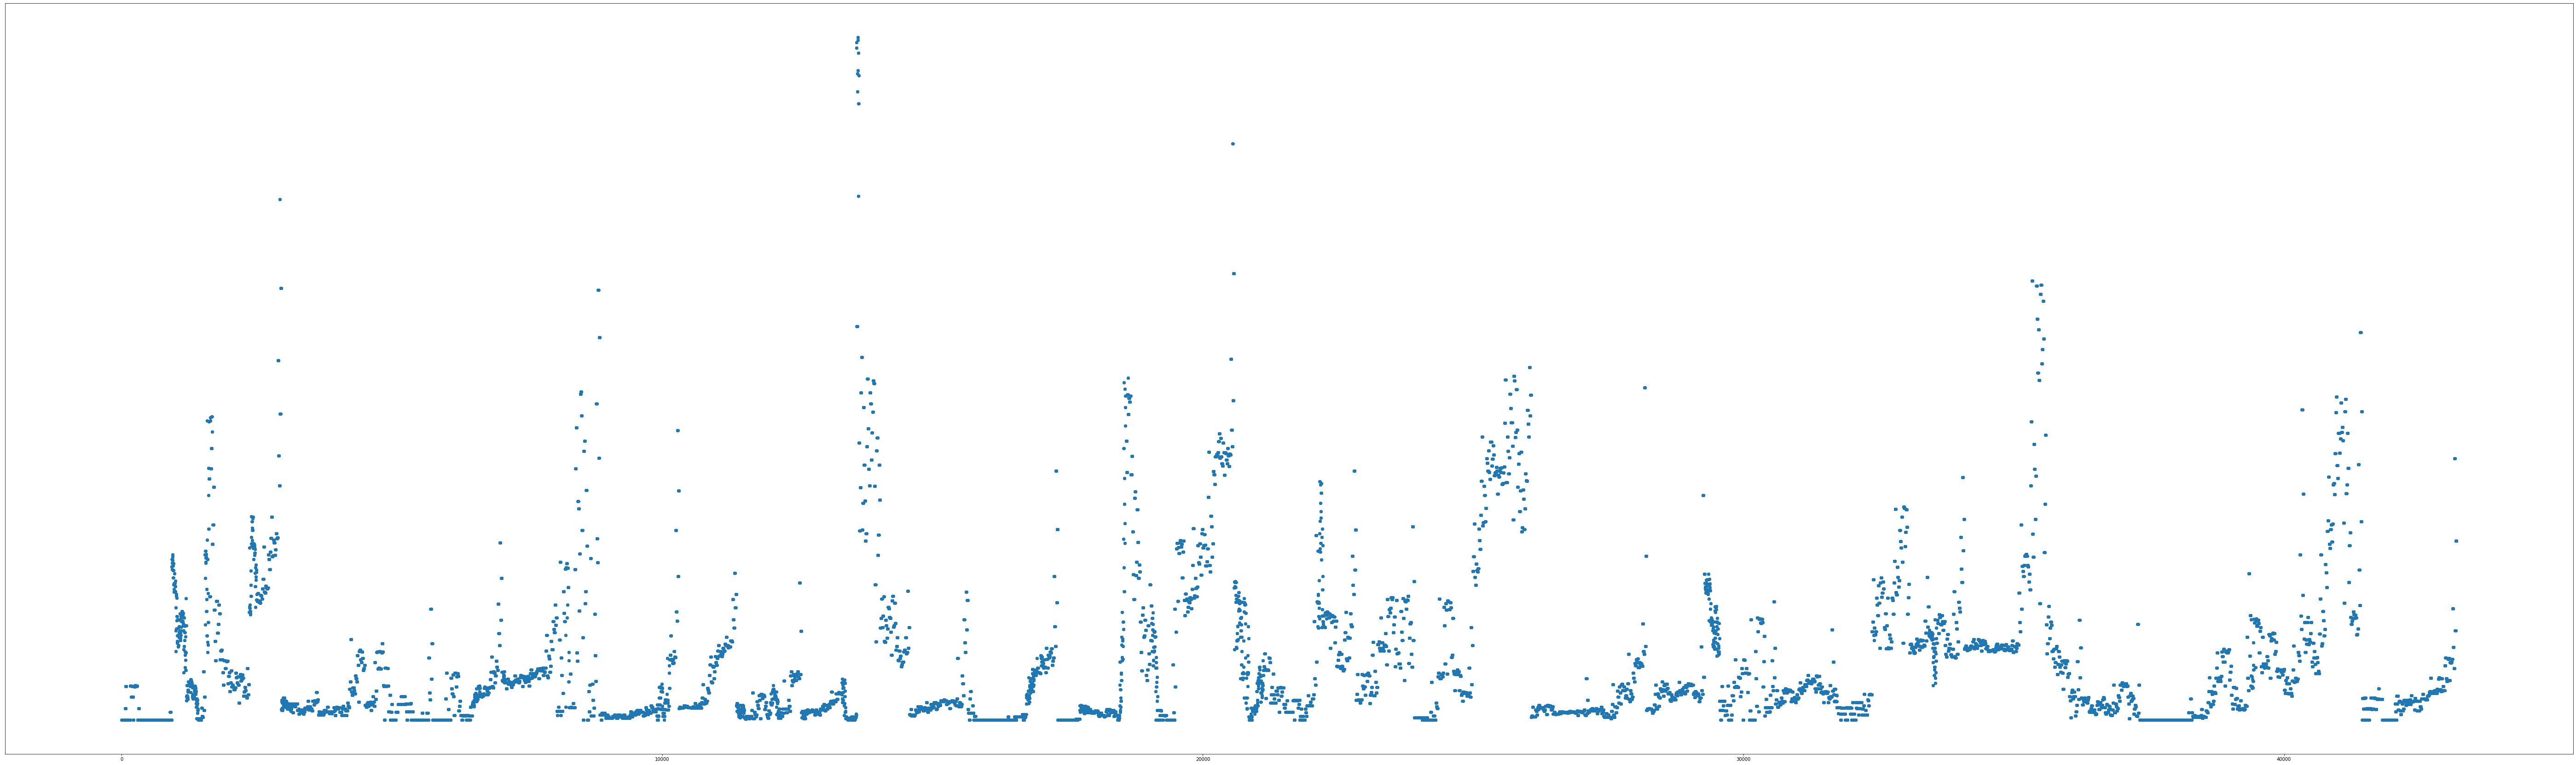

In [ ]:
investigation_count = new_df['Percent Pending Investigation'].to_numpy()
plt.figure(figsize=(100, 30))
plt.yticks([])
plt.scatter(range(investigation_count.shape[0]), investigation_count)
plt.show()

In [ ]:
new_df['Percent Pending Investigation'].describe()

count    43189.000000
mean         0.119653
std          0.157033
min          0.000000
25%          0.018370
50%          0.057830
75%          0.153954
max          1.411568
Name: Percent Pending Investigation, dtype: float64

### Data value

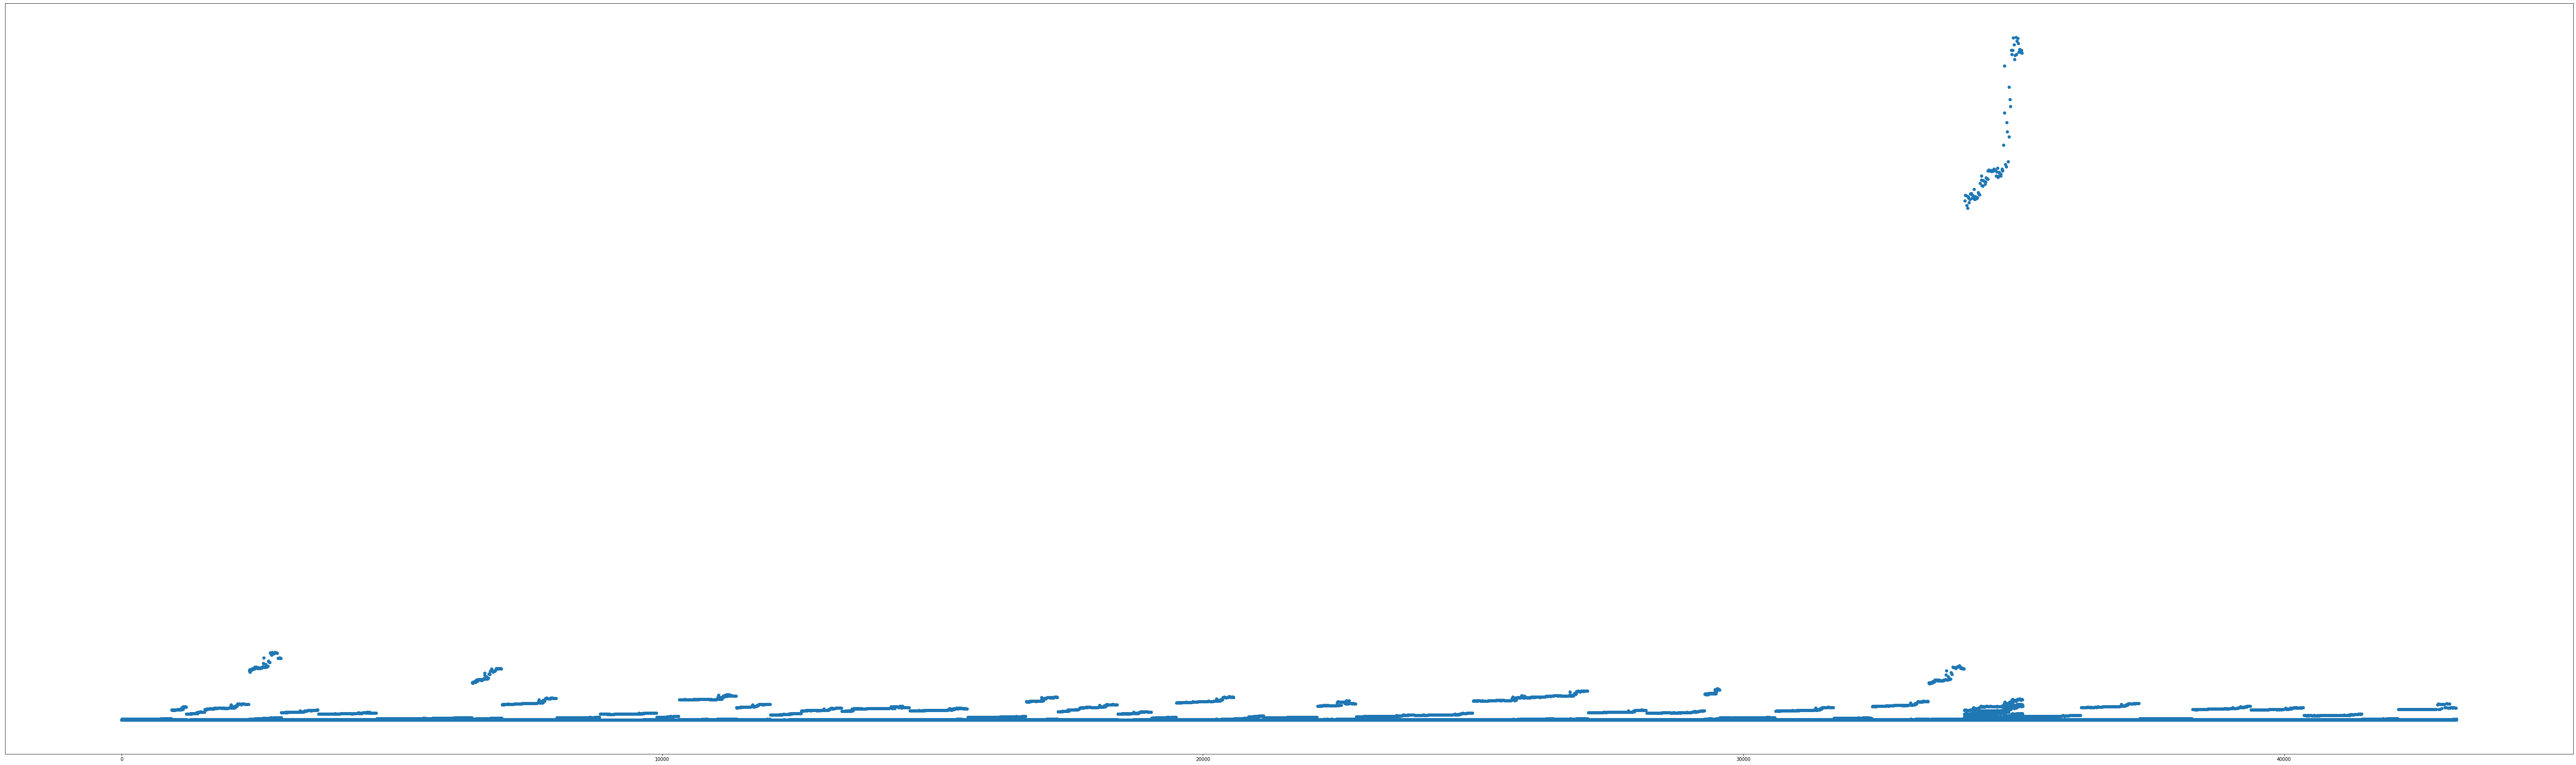

In [ ]:
dv_array = new_df['Data Value'].to_numpy()
plt.figure(figsize=(100, 30))
plt.yticks([])
plt.scatter(range(dv_array.shape[0]), dv_array)
plt.show()

In [ ]:
new_df['Data Value'].describe()

count    4.318900e+04
mean     1.340984e+04
std      1.377870e+05
min      1.000000e+01
25%      9.585492e+01
50%      3.100000e+02
75%      1.202000e+03
max      3.538073e+06
Name: Data Value, dtype: float64